## Семинар 4. Критерии согласия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
import seaborn as sns
sns.set()

In [3]:
plt.rcParams['figure.figsize'] = (10, 7) #параметры графиков по умолчанию по всему файлу

### Генерируем данные

###### Нормальная выборка

In [4]:
norm_sample = stats.norm.rvs(size=10000)

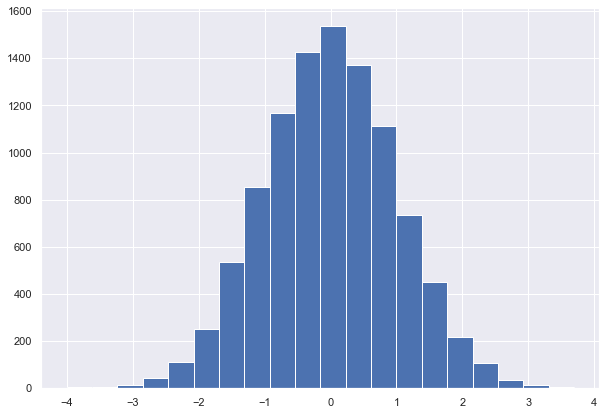

In [5]:
plt.hist(norm_sample, bins=20)
pass

##### Скошенная выборка

In [6]:
skewed_sample = stats.norm.rvs(-1, size=10000) + stats.expon.rvs(size=10000)

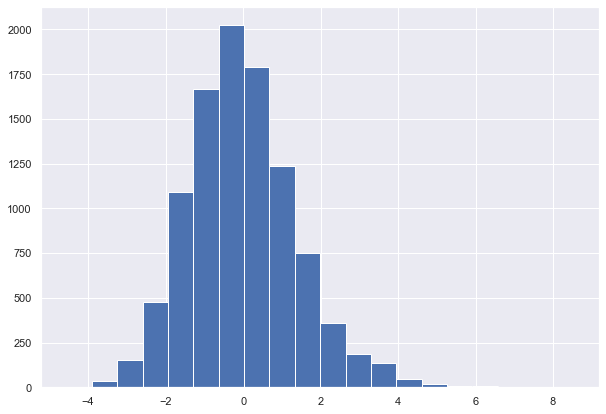

In [7]:
plt.hist(skewed_sample, bins=20);

##### Показательное распределение

In [8]:
exp_sample = stats.expon.rvs(size=10000)

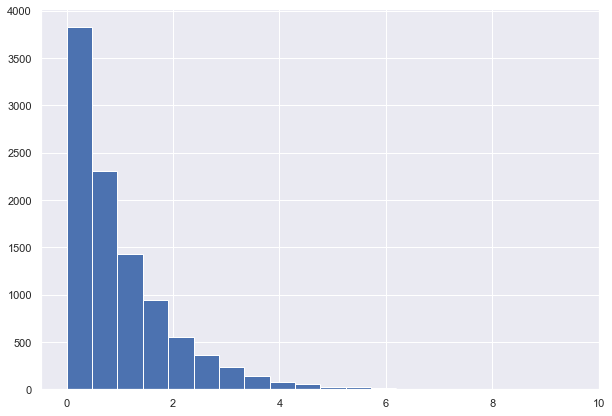

In [9]:
plt.hist(exp_sample, bins=20);

##### Стьюдент

In [10]:
t_sample = stats.t.rvs(30, size=10000)

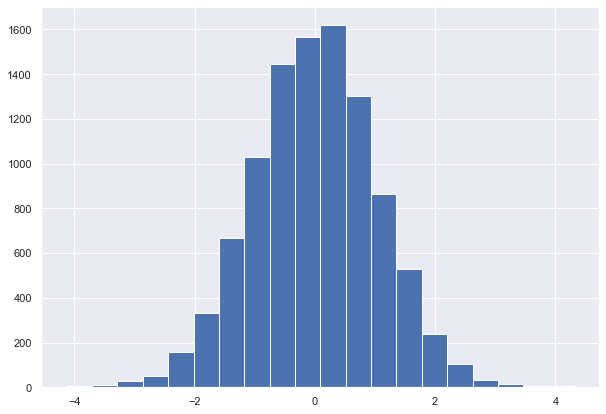

In [11]:
plt.hist(t_sample, bins=20);

## QQ Plot

##### Нормальная выборка

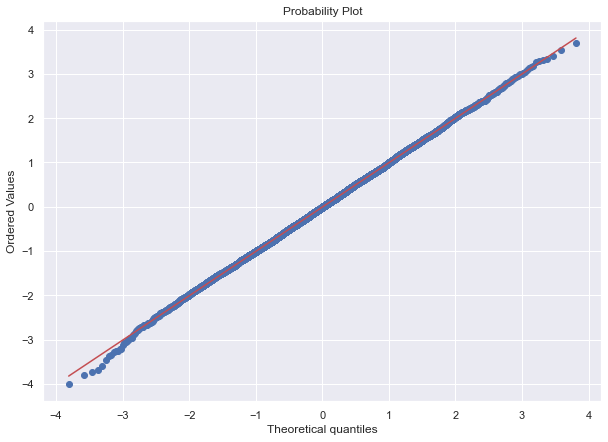

In [12]:
stats.probplot(norm_sample, plot=plt);

##### Скошенная выборка

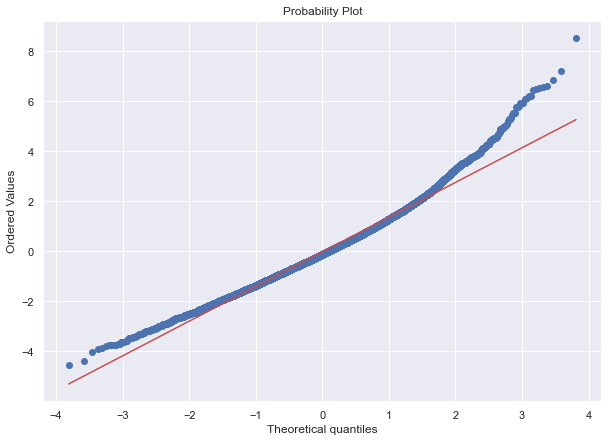

In [13]:
stats.probplot(skewed_sample, plot=plt);

##### Показательное распределение

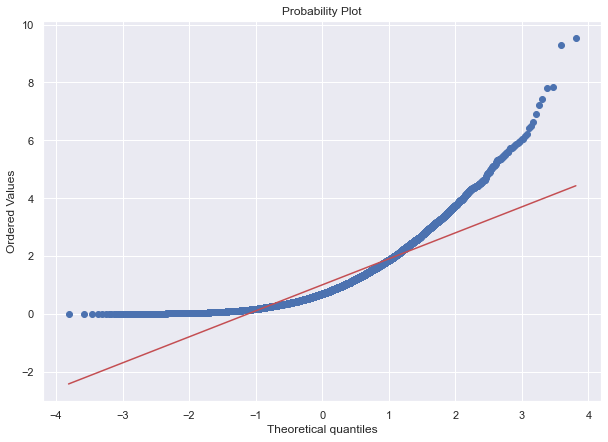

In [14]:
stats.probplot(exp_sample, plot=plt);

##### Стьюдент

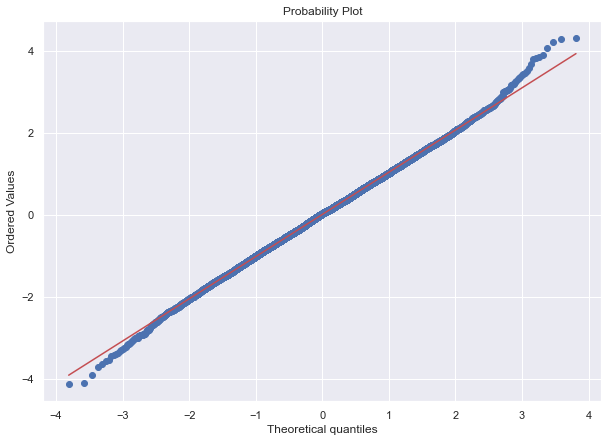

In [15]:
stats.probplot(t_sample, plot=plt);

### Критерии согласия

### Тест Колмогорова-Смирнова

##### Проверяем на N(0,1):

In [16]:
stats.kstest(norm_sample, stats.norm.cdf)

KstestResult(statistic=0.009387567497972454, pvalue=0.33939014662777833)

$p\_value > 0.05 \Rightarrow$ нормальное  

In [17]:
#Можно еще записать так:
stats.kstest(norm_sample, 'norm')

KstestResult(statistic=0.009387567497972454, pvalue=0.33939014662777833)

In [18]:
stats.kstest(skewed_sample, stats.norm.cdf)

KstestResult(statistic=0.08587680374885981, pvalue=1.3038357696091499e-64)

In [19]:
stats.kstest(exp_sample, stats.norm.cdf)

KstestResult(statistic=0.500050512419378, pvalue=0.0)

In [20]:
stats.kstest(t_sample, stats.norm.cdf)

KstestResult(statistic=0.011292231139216846, pvalue=0.1548727922490991)

##### Проверяем, например, на N(1, 4):

In [21]:
# так не работает:
stats.kstest(norm_sample, stats.norm.cdf(x, loc=1, scale=2))

NameError: name 'x' is not defined

In [ ]:
#делаем так:
def N_1_4_cdf(x):
    return stats.norm.cdf(x, loc=1, scale=2)
stats.kstest(norm_sample, N_1_4_cdf)

In [ ]:
#или
stats.kstest(norm_sample, lambda x: stats.norm.cdf(x, loc=1, scale=2))

In [ ]:
N14_sample = stats.norm.rvs(1, 2, size=10000)
stats.kstest(N14_sample, lambda x: stats.norm.cdf(x, loc=1, scale=2))

##### А сработает ли для дискретных распределений?

In [ ]:
binom_sample = stats.binom.rvs(1000, 0.5, size=10000)

In [ ]:
stats.kstest(binom_sample, lambda x: stats.binom.cdf(x, 1000, 0.5))

### Тест Андерсона-Дарлинга

Тест работает для N(0,1), Exp(1) и еще пары распределений.

Тест выдает значение статистики, набор квантилей вида $x_{1-\alpha}$ и набор соответствующих значений $\alpha$ (в %).

##### Проверяем на N(0,1):

In [ ]:
stats.anderson(norm_sample, 'norm')

In [ ]:
stats.anderson(skewed_sample, 'norm')

In [ ]:
stats.anderson(t_sample, 'norm')

##### Проверяем на Exp(1):

In [ ]:
stats.anderson(exp_sample, 'expon')

### Тест хи-квадрат (Пирсона и Фишера) --- "наброски"

In [ ]:
def chisquare_normality_test(d, loc=None, scale=None, min_bin_value=-3, max_bin_value=3, nbins=17):
    """
    :param d: array like -- initial data
    :param loc: loc parameter of norm distribution for calculating theoretical frequencies
    if loc is None then d.mean() is used
    :param scale: scale parameter of norm distribution for calculating theoretical frequencies
    if scale is None then d.std(ddof=0) is used
    :param min_bin_value: right bound of the first bin ([-np.inf, min_bin_value])
    :param max_bin_value: left bound of the last bin ([max_bin_value, np.inf])
    :param nbins: number of bins
    """
    
    bins = [-np.inf] + list(np.linspace(min_bin_value, max_bin_value, max(nbins-1, 2))) + [np.inf]
    
    if loc is None and scale is None:
        degrees_of_freedom = 2
    elif loc is not None and scale is not None:
        degrees_of_freedom = 0
    else:
        degrees_of_freedom = 1
        
    sf = np.histogram(d, bins)[0]
    
    loc = loc or d.mean()
    scale = scale or d.std(ddof=0)

    tf = [stats.norm.cdf(bins[i], loc=loc, scale=scale) - stats.norm.cdf(bins[i-1], loc=loc, scale=scale) 
                   for i in range(1, len(bins))]
    tf = np.array(tf)*len(d)
    
    return stats.chisquare(sf, tf, ddof=degrees_of_freedom), stats.chisquare(sf, tf, ddof=0)


In [ ]:
#Тест выдает два значения p-value. Если они не совпадают, то истинное значение p-value лежит между ними.
chisquare_normality_test(t_sample)

In [ ]:
chisquare_normality_test(t_sample, nbins=27)

In [ ]:
chisquare_normality_test(norm_sample, loc=0, scale=2)

### Проверка на нормальность

### Тест Шапиро-Уилка

NB: Работает корректно только для выборок объема меньше 5000

In [22]:
stats.shapiro(norm_sample)

/home/andrew/miniconda3/envs/da/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9998210072517395, pvalue=0.621127724647522)

In [23]:
short_norm_sample = stats.norm.rvs(size=3000)
stats.shapiro(short_norm_sample)

ShapiroResult(statistic=0.9996113777160645, pvalue=0.8531141877174377)

In [24]:
short_t_sample = stats.t.rvs(30, size=3000)
stats.shapiro(short_t_sample)

ShapiroResult(statistic=0.9995790123939514, pvalue=0.8005158305168152)

### Тест Харке-Бера

NB: Работает корректно только для выборок объема больше 2000 (тогда можно считать, что статистика имеет приблизительно распределение хи-квадрат с двумя степенями свободы)

In [25]:
stats.jarque_bera(t_sample)

Jarque_beraResult(statistic=20.56277985808141, pvalue=3.4264869926414754e-05)

In [26]:
stats.jarque_bera(norm_sample)

Jarque_beraResult(statistic=0.22475649407999196, pvalue=0.8937061518540934)

In [27]:
#Подсчет p-value вручную:
res = stats.jarque_bera(norm_sample)
statistics = res[0]
p_value = 1 - stats.chi2.cdf(statistics, 2)
p_value

0.8937061518540934

### Тест Лиллиефорса

До сих пор находится в разработке, периодически выдает ошибки (чаще всего на выборках объема больше 900).

Если p-value получается больше 0.2, то выдает 0.2.

In [28]:
from statsmodels.stats.diagnostic import lilliefors

In [29]:
short_norm_sample = stats.norm.rvs(size=800)
lilliefors(short_norm_sample)

(0.014770740441928054, 0.9552053356015046)

In [30]:
short_t_sample = stats.t.rvs(4, size=800)
lilliefors(short_t_sample)

(0.06590699120778121, 0.0009999999999998899)

In [31]:
short_t_sample = stats.t.rvs(10, size=800)
lilliefors(short_t_sample)

(0.018842628160332775, 0.724385265213766)

# Bootstrap

In [32]:
sample = pd.read_csv("Bootstrap_sample.txt")

In [33]:
sample = sample['sample']

In [34]:
n = len(sample)
n

1000

Итак, есть некоторая выборка из неизвестного распределения:

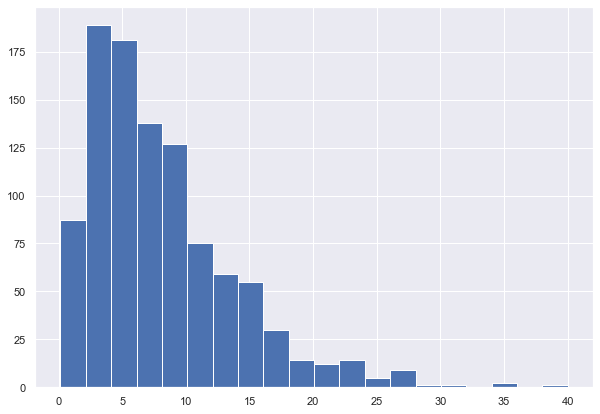

In [35]:
plt.hist(sample, bins=20)
pass

In [36]:
stats.shapiro(sample) 

ShapiroResult(statistic=0.8891561031341553, pvalue=3.5763381998231804e-26)

In [37]:
stats.anderson(sample, 'expon')

AndersonResult(statistic=46.276572620782645, critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.956]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Требуется, например, построить доверительный интервал для медианы.

In [38]:
np.percentile(sample, 50) #точечная оценка медианы

6.676222194278681

In [39]:
bootstrap = np.random.choice(sample, size=(100, n)) #генерируем 100 бутстрэпных выборок объема n

In [40]:
v_boot = np.percentile(bootstrap, 50, axis=1).var()  #axis=1: см. по строкам
v_boot

0.03259560765575145

In [41]:
np.percentile(bootstrap, 50, axis=1)

array([6.76908561, 6.61195702, 6.4640749 , 6.9593867 , 6.52544122,
       6.5084047 , 6.55053488, 6.58961265, 6.72603657, 6.58560188,
       6.7721254 , 6.58075484, 6.70833587, 6.69199994, 6.94051044,
       6.73419539, 6.66984568, 6.51658751, 6.6348418 , 6.24046216,
       6.38258998, 6.68259871, 6.79514651, 6.60651107, 6.89702599,
       6.82813612, 6.49251996, 6.84646705, 6.74510431, 6.67622219,
       6.72325274, 6.71649469, 6.72328648, 6.37331514, 6.52544122,
       6.66271593, 6.62217814, 6.58560188, 6.58141908, 6.84646705,
       6.31164184, 6.48139775, 6.73787436, 6.6348418 , 6.76604582,
       6.58208332, 6.49654649, 6.60384453, 6.6348418 , 6.50773381,
       6.48139775, 6.44199503, 7.15898051, 6.85035596, 7.21091267,
       6.33270331, 6.52544122, 6.70274933, 6.90750207, 6.70696884,
       6.64748957, 6.64293841, 6.91164663, 6.67622219, 6.93940536,
       6.70274933, 6.69199994, 6.68312979, 6.72328648, 6.78514108,
       6.70553316, 6.58273151, 6.64748957, 6.69968532, 6.93551

In [42]:
gamma=0.9
g = (1 + gamma)/2.0

In [43]:
(
    np.percentile(sample, 50) - stats.norm.ppf(g) * np.sqrt(v_boot),
    np.percentile(sample, 50) + stats.norm.ppf(g) * np.sqrt(v_boot)
)

(6.3792561475237015, 6.973188241033661)